In [25]:
import numpy as np
import matplotlib.pyplot as plt
from math import acos, degrees
from shapely.geometry import Polygon

In [26]:
# Input vertices
vertices = np.array([(9.05, 7.76), (12.5, 3.0), (10.0, 0.0), (5.0, 0.0), (2.5, 3.0)])

In [27]:
# --- 1. Compute edge vectors ---
def compute_edge_vectors(verts):
    edge_vectors = []
    n = len(verts)
    for i in range(n):
        start = verts[i]
        end = verts[(i + 1) % n]  # wrap around to form closed polygon
        edge_vectors.append(end - start)
    return np.array(edge_vectors)

In [28]:
# Polygon area using classic Shoelace formula
def polygon_area_shoelace(verts):
    x = verts[:, 0]
    y = verts[:, 1]
    return float(0.5 * abs(np.dot(x, np.roll(y, -1)) - np.dot(y, np.roll(x, -1))))

In [29]:
# Compute edge lengths using vector norms
def calculate_edge_lengths(edge_vectors):
    lengths = np.linalg.norm(edge_vectors, axis=1)
    return [float(l) for l in lengths]  # convert to plain floats

In [30]:
# Compute interior angles using dot product formula
def determine_interior_angles(edge_vectors):
    angles = []
    n = len(edge_vectors)
    for i in range(n):
        prev_vec = -edge_vectors[i - 1]  # reverse previous edge to get angle at vertex
        curr_vec = edge_vectors[i]
        prev_u = prev_vec / np.linalg.norm(prev_vec)
        curr_u = curr_vec / np.linalg.norm(curr_vec)
        dot_val = np.clip(np.dot(prev_u, curr_u), -1.0, 1.0)
        angle = 180 - degrees(acos(dot_val))  # interior angle
        angles.append(float(angle))  # convert to plain float
    return angles

In [31]:
# Convexity check
def check_polygon_convexity(angles):
    return all(a < 180 for a in angles)

In [32]:
# Centroid as average of vertices
def average_centroid(verts):
    return tuple(map(float, np.mean(verts, axis=0)))  # convert to tuple of floats

In [33]:
# Processing
edge_vectors = compute_edge_vectors(vertices)
computed_area = polygon_area_shoelace(vertices)
edge_lengths_list = calculate_edge_lengths(edge_vectors)
interior_angles_list = determine_interior_angles(edge_vectors)
is_polygon_convex = check_polygon_convexity(interior_angles_list)
computed_centroid = average_centroid(vertices)

In [34]:
# Shapely comparisons
shapely_poly = Polygon(vertices)
shapely_area = float(shapely_poly.area)
shapely_centroid = tuple(map(float, shapely_poly.centroid.coords[0]))

In [35]:
# Console Output
print("Polygon Analysis:")
print(f" - Computed Area (Shoelace): {computed_area}")
print(f" - Shapely Area: {shapely_area}")
print(f" - Edge Lengths: {edge_lengths_list}")
print(f" - Interior Angles (degrees): {interior_angles_list}")
print(f" - Is Convex: {is_polygon_convex}")
print(f" - Computed Centroid: {computed_centroid}")
print(f" - Shapely Centroid: {shapely_centroid}")

Polygon Analysis:
 - Computed Area (Shoelace): 46.300000000000004
 - Shapely Area: 46.3
 - Edge Lengths: [5.878783887846192, 3.905124837953327, 5.0, 3.905124837953327, 8.096919167189457]
 - Interior Angles (degrees): [90.07234190165771, 75.73979234162641, 50.19442890773479, 50.19442890773479, 93.79900794124624]
 - Is Convex: True
 - Computed Centroid: (7.81, 2.752)
 - Shapely Centroid: (7.765586753059756, 3.167660187185025)


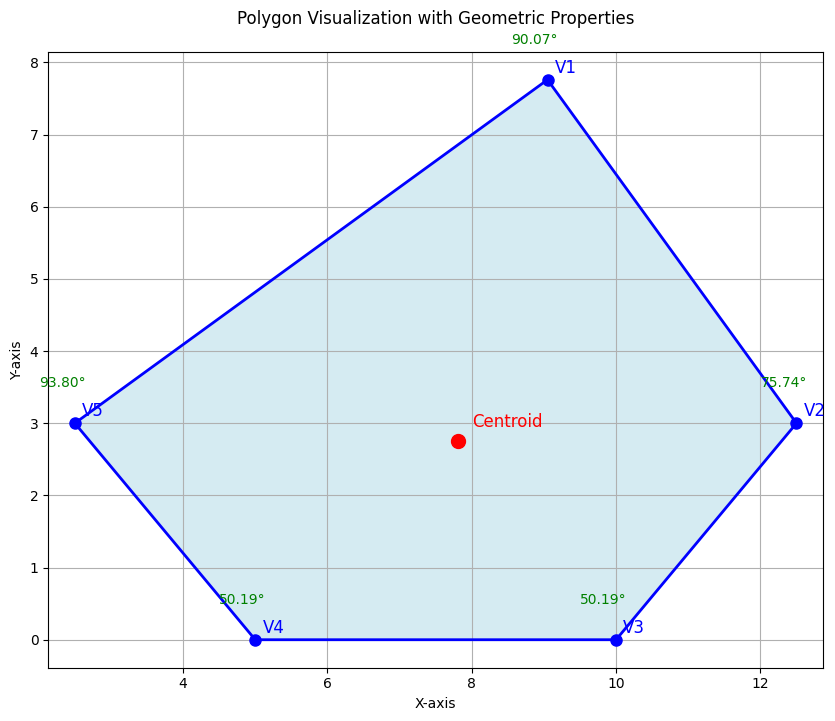

In [36]:
# Visualization
plt.figure(figsize=(10, 8))
# Fill polygon
plt.fill(vertices[:, 0], vertices[:, 1], color='lightblue', alpha=0.5)
# Outline edges and close loop
plt.plot(np.append(vertices[:, 0], vertices[0, 0]),
         np.append(vertices[:, 1], vertices[0, 1]), 'b-', linewidth=2)
# Vertices
plt.plot(vertices[:, 0], vertices[:, 1], 'bo', markersize=8)
for i, (x, y) in enumerate(vertices):
    plt.text(x + 0.1, y + 0.1, f'V{i+1}', fontsize=12, color='blue')

# Centroid
plt.plot(computed_centroid[0], computed_centroid[1], 'ro', markersize=10)
plt.text(computed_centroid[0] + 0.2, computed_centroid[1] + 0.2, 'Centroid', fontsize=12, color='red')

# Annotate angles
for i, ang in enumerate(interior_angles_list):
    x, y = vertices[i]
    plt.text(x - 0.5, y + 0.5, f'{ang:.2f}°', fontsize=10, color='green')

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polygon Visualization with Geometric Properties", pad=20)
plt.grid(True)
plt.axis('equal')
plt.show()